In [1]:
!pip install segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 6.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab.patches import cv2_imshow 

In [4]:
import tensorflow as tf
import os

In [5]:
import numpy as np
from tqdm import tqdm 
import cv2
import imageio
import segmentation_models as sm
#from patchify import patchify

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

Segmentation Models: using `keras` framework.


In [6]:
image_path250 = '/content/gdrive/MyDrive/IMG/1-250'
image_path1250 = '/content/gdrive/MyDrive/IMG/1001-1250'
image_path1500 = '/content/gdrive/MyDrive/IMG/1251-1500'
image_path1750 = '/content/gdrive/MyDrive/IMG/1501-1750'
image_path2000 = '/content/gdrive/MyDrive/IMG/1751-2000'
image_path2250 = '/content/gdrive/MyDrive/IMG/2001-2250'
image_path2500 = '/content/gdrive/MyDrive/IMG/2251-2500'
image_path2750 = '/content/gdrive/MyDrive/IMG/2501-2750'
image_path500 = '/content/gdrive/MyDrive/IMG/251-500'
image_path3100 = '/content/gdrive/MyDrive/IMG/2751-3101'
image_path750 = '/content/gdrive/MyDrive/IMG/501-750'
image_path1000 = '/content/gdrive/MyDrive/IMG/751-1000'
mask_path = '/content/gdrive/MyDrive/instance+ripeness_segmentation'

image_id250 =  next(os.walk(image_path250))[2]
image_id1250 =  next(os.walk(image_path1250))[2]
image_id1500 =  next(os.walk(image_path1500))[2]
image_id1750 =  next(os.walk(image_path1750))[2]
image_id2000 =  next(os.walk(image_path2000))[2]
image_id2250 =  next(os.walk(image_path2250))[2]
image_id2500 =  next(os.walk(image_path2500))[2]
image_id2750 =  next(os.walk(image_path2750))[2]
image_id500 =  next(os.walk(image_path500))[2]
image_id3100 =  next(os.walk(image_path3100))[2]
image_id750 =  next(os.walk(image_path750))[2]
image_id1000 =  next(os.walk(image_path1000))[2]

image_path = [image_path250, image_path500, image_path750, image_path1000, image_path1250, image_path1500, 
              image_path1750, image_path2000, image_path2250, image_path2500,image_path2750, image_path3100]
image_id = [image_id250, image_id500, image_id750, image_id1000, image_id1250, image_id1500, 
            image_id1750, image_id2000, image_id2250, image_id2500,image_id2750, image_id3100]
mask_id = next(os.walk(mask_path))[2]



In [7]:
img_id = [] 
m_id = []

for i in range(len(image_id)):
  id = image_id[i]
  for j in range(len(id)):
     im_i = id[j].strip('.png')
     img_id.append(int(im_i))
img_id = np.sort(img_id)

for i in range(len(mask_id)):
  mid = mask_id[i].strip('.png')
  m_id.append(int(mid))
m_id = np.sort(m_id)

id = np.intersect1d(img_id, m_id)
len(id), len(img_id), len(m_id)

(3000, 3000, 3000)

In [8]:
def sizedec(img):
  r = 512.0 / img.shape[1]
  dim = (512, int(img.shape[0] * r))
  img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
  return img

In [9]:
def data_load(image_id, image_path):
  for n, id_ in tqdm(enumerate(image_id), total=len(image_id)):   
   #print(id_)
   i = id_.strip('.png')
   if int(i) in id:
    path = image_path +'/' + id_
    path1 = mask_path + '/' + id_

    img = cv2.imread(path)
    s = max(img.shape[0:2])
    f = np.zeros((s,s,3),np.uint8)
    ax,ay = (s - img.shape[1])//2,(s - img.shape[0])//2
    f[ay:img.shape[0]+ay,ax:ax+img.shape[1]] = img 
    img = np.array(sizedec(f))
    image.append(img)

    mask_ = cv2.imread(path1)
    s = max(mask_.shape[0:2])
    f = np.zeros((s,s,3),np.uint8)
    ax,ay = (s - mask_.shape[1])//2,(s - mask_.shape[0])//2
    f[ay:mask_.shape[0]+ay,ax:ax+mask_.shape[1]] = mask_ 
    mask_ = np.array(sizedec(f))  
    mask.append(mask_) 

In [10]:
#

In [11]:
image = []
mask = []

In [12]:
data_load(image_id[0], image_path[0])
data_load(image_id[3], image_path[3])
data_load(image_id[5], image_path[5])
data_load(image_id[7], image_path[7])

100%|██████████| 242/242 [11:45<00:00,  2.92s/it]


In [13]:
#for i in range(3):
#  data_load(image_id[i], image_path[i])

In [14]:
#for i in range(2):
#  data_load(image_id[i+3], image_path[i+3])

In [15]:
'for i in range(3):''data_load(image_id[i+3+3], image_path[i+3+3])'

'for i in range(3):data_load(image_id[i+3+3], image_path[i+3+3])'

In [16]:
'for i in range(3):'
'data_load(image_id[i+3+3+3], image_path[i+3+3+3])'

'data_load(image_id[i+3+3+3], image_path[i+3+3+3])'

In [17]:
image = np.array(image)
mask = np.array(mask)

In [18]:
ripe = []
unripe = []
pripe = []

for i in range(8):
  ripe.append([i,0,0])
  unripe.append([0,i,0])
  pripe.append([0,0,i])

In [19]:
def rgb_to_2D_label(label):
  
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    for i in range(8):
      label_seg [np.all(label==ripe[i],axis=-1)] = 3
      label_seg [np.all(label==pripe[i],axis=-1)] = 2
      label_seg [np.all(label==unripe[i],axis=-1)] = 1

    label_seg = label_seg[:,:,0]  
    
    return label_seg

In [20]:
labels = []
for i in range(mask.shape[0]):
    label = rgb_to_2D_label(mask[i])
    labels.append(label)    

labels = np.array(labels)   
labels = np.expand_dims(labels, axis=3)

In [21]:
n_classes = len(np.unique(labels))
label_cat = to_categorical(labels, num_classes = n_classes)
label_cat.shape

(966, 512, 512, 4)

In [22]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(np.ravel(labels,order='C')), 
                               y = np.ravel(labels,order='C'))

d_loss = sm.losses.DiceLoss(class_weights=weights)
f_loss = sm.losses.CategoricalFocalLoss()
t_loss = d_loss + (1 * f_loss)
weights

array([103.8273234 ,   0.25633144,  24.19349668,  20.90472874])

In [23]:
f_loss,d_loss

(<segmentation_models.losses.CategoricalFocalLoss at 0x7f390def52e0>,
 <segmentation_models.losses.DiceLoss at 0x7f390def56a0>)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image, label_cat, test_size = 0.20, random_state = 0)
X_train[0].shape

(512, 512, 3)

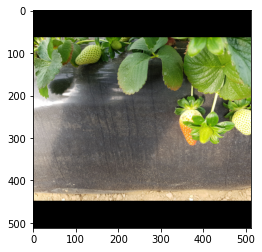

In [25]:
image.shape,label_cat.shape, X_train.shape[1]
X = X_train[1]
plt.imshow(X[:,:,::-1])

In [26]:
img_w = 512
img_h = 512
img_c = 3

#building model
inputs = tf.keras.layers.Input((img_w, img_h, img_c))

#downsampling
convolv_1 = tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(inputs)
convolv_1 = tf.keras.layers.Dropout(0.1)(convolv_1)
convolv_1 = tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(convolv_1)
maxp_1 = tf.keras.layers.MaxPooling2D((2, 2))(convolv_1)

convolv_2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(maxp_1)
convolv_2 = tf.keras.layers.Dropout(0.1)(convolv_2)
convolv_2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(convolv_2)
maxp_2 = tf.keras.layers.MaxPooling2D((2, 2))(convolv_2)
 
convolv_3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(maxp_2)
convolv_3 = tf.keras.layers.Dropout(0.2)(convolv_3)
convolv_3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(convolv_3)
maxp_3 = tf.keras.layers.MaxPooling2D((2, 2))(convolv_3)
 
convolv_4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(maxp_3)
convolv_4 = tf.keras.layers.Dropout(0.2)(convolv_4)
convolv_4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(convolv_4)
maxp_4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(convolv_4)
 
convolv_5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(maxp_4)
convolv_5 = tf.keras.layers.Dropout(0.3)(convolv_5)
convolv_5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(convolv_5)

#upsampling
convolv_6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(convolv_5)
convolv_6 = tf.keras.layers.concatenate([convolv_6, convolv_4])
convolv_6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(convolv_6)
convolv_6 = tf.keras.layers.Dropout(0.2)(convolv_6)
convolv_6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(convolv_6)
 
convolv_7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(convolv_6)
convolv_7 = tf.keras.layers.concatenate([convolv_7, convolv_3])
convolv_7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(convolv_7)
convolv_7 = tf.keras.layers.Dropout(0.2)(convolv_7)
convolv_7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(convolv_7)
 
convolv_8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(convolv_7)
convolv_8 = tf.keras.layers.concatenate([convolv_8, convolv_2])
convolv_8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(convolv_8)
convolv_8 = tf.keras.layers.Dropout(0.1)(convolv_8)
convolv_8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(convolv_8)
 
convolv_9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(convolv_8)
convolv_9 = tf.keras.layers.concatenate([convolv_9, convolv_1], axis=3)
convolv_9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(convolv_9)
convolv_9 = tf.keras.layers.Dropout(0.1)(convolv_9)
convolv_9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(convolv_9)

outputs = tf.keras.layers.Conv2D(4, (1, 1), activation='softmax')(convolv_9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
#model.save('U-net.model')

In [28]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 512, 512, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [29]:
history1 = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=25, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/25
49/49 [==============================] - 50s 720ms/step - loss: 4.3522 - accuracy: 0.8679 - val_loss: 0.2311 - val_accuracy: 0.9730
Epoch 2/25
49/49 [==============================] - 31s 638ms/step - loss: 0.1734 - accuracy: 0.9642 - val_loss: 0.0977 - val_accuracy: 0.9680
Epoch 3/25
49/49 [==============================] - 33s 665ms/step - loss: 0.0938 - accuracy: 0.9692 - val_loss: 0.0843 - val_accuracy: 0.9711
Epoch 4/25
49/49 [==============================] - 33s 668ms/step - loss: 0.0823 - accuracy: 0.9709 - val_loss: 0.0794 - val_accuracy: 0.9721
Epoch 5/25
49/49 [==============================] - 32s 659ms/step - loss: 0.0760 - accuracy: 0.9719 - val_loss: 0.0763 - val_accuracy: 0.9724
Epoch 6/25
49/49 [==============================] - 32s 661ms/step - loss: 0.0714 - accuracy: 0.9726 - val_loss: 0.0714 - val_accuracy: 0.9730
Epoch 7/25
49/49 [==============================] - 33s 664ms/step - loss: 0.0684 - accuracy: 0.9732 - val_loss: 0.0699 - val_accuracy: 0.9733

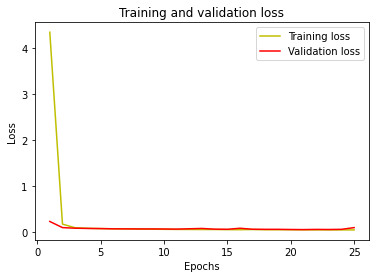

In [30]:
history = history1
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)

7/7 [==============================] - 8s 313ms/step


In [32]:
y_pred.shape

(194, 512, 512, 4)

In [33]:
from keras.metrics import MeanIoU
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.2719232


In [34]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test_argmax[test_img_number]
#test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]
test_img_input.shape

1/1 [==============================] - 1s 849ms/step


(1, 512, 512, 3)

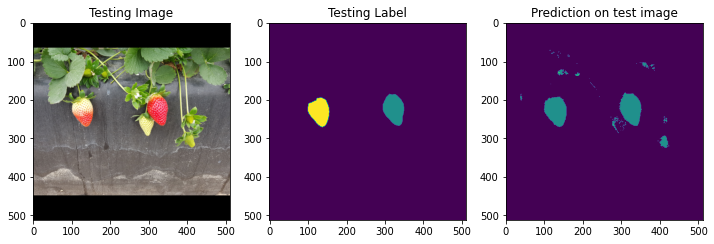

In [35]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,::-1])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()

In [36]:
import cv2

In [37]:
def test_model(t_img):
  s = max(t_img.shape[0:2])
  f = np.zeros((s,s,3),np.uint8)
  ax,ay = (s - t_img.shape[1])//2,(s - t_img.shape[0])//2
  f[ay:t_img.shape[0]+ay,ax:ax+t_img.shape[1]] = t_img 
  f = np.array(sizedec(f))
  t_img = np.expand_dims(f, 0)
  t_img.shape
  cv2_imshow(f)
  prediction = model.predict(t_img)
  predicted_img=np.argmax(prediction, axis=3)[0,:,:]
  plt.imshow(predicted_img)

In [38]:
t_img = cv2.imread("1274.png")

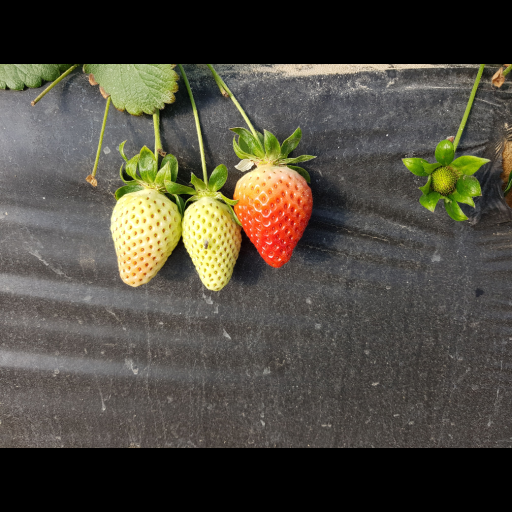

1/1 [==============================] - 0s 23ms/step


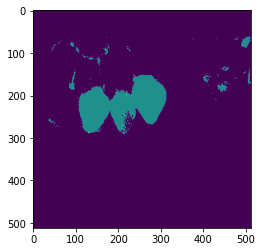

In [39]:
test_model(t_img)

In [40]:
t_img = cv2.imread("1147.png")

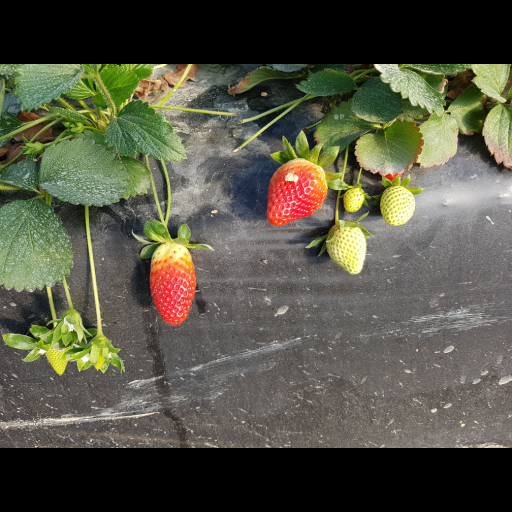

1/1 [==============================] - 0s 19ms/step


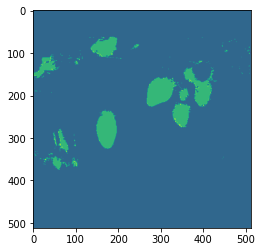

In [41]:
test_model(t_img)

In [42]:
t_img = cv2.imread("1215.png")

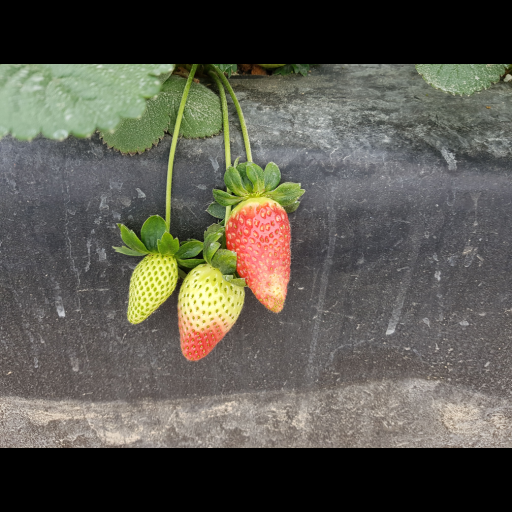

1/1 [==============================] - 0s 28ms/step


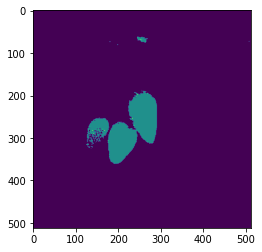

In [43]:
test_model(t_img)

In [44]:
t_img = cv2.imread("1272.png")

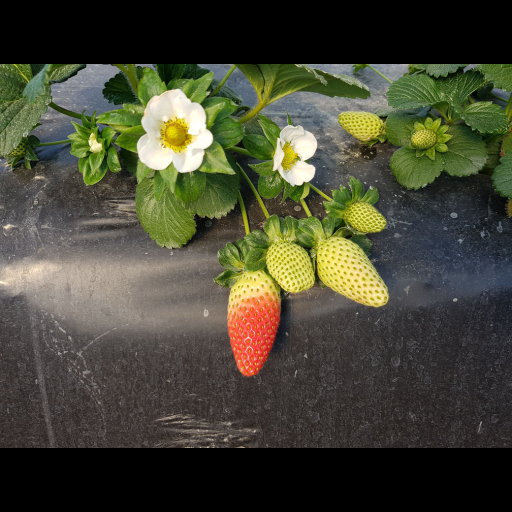

1/1 [==============================] - 0s 23ms/step


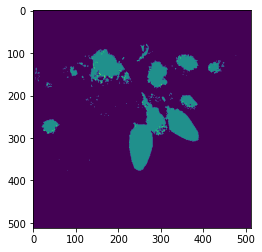

In [45]:
test_model(t_img)

In [46]:
t_img = cv2.imread("1286.png")

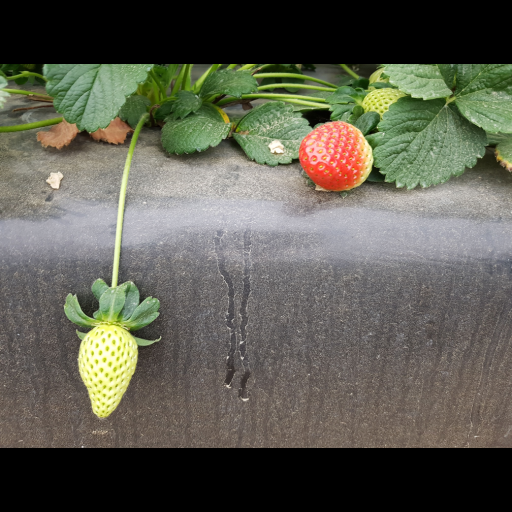

1/1 [==============================] - 0s 18ms/step


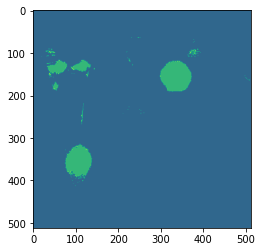

In [47]:
test_model(t_img)

In [49]:
model.save('U-net_model.h5') 

In [48]:
#checkpointer = tf.keras.callbacks.ModelCheckpoint('U-net.model', verbose=1, save_best_only=True)

#callbacks = [
 #       tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
  #      tf.keras.callbacks.TensorBoard(log_dir='logs')]

#history1 = model.fit(X_train, y_train, 
                 #   batch_size = 16, 
                  #  verbose=1, 
                   # epochs=25, 
                    #validation_data=(X_test, y_test), 
                    #shuffle=False)

#results = model.fit(X_train, y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)